## About our data

Dataset 1:
From the US Energy Information Administration (EIA)
Info about current operable electric power plants in the US by energy source

Dataset 2:
TIGER shapefiles from US Census Bureau depicting state boundaries

In [47]:
# import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# update pandas display option
pd.set_option("display.max.columns",None)

We want to make a geopandas geodataframe from our csv data.

In [32]:
# import csv data using pandas
power_plants = pd.read_csv('data/power_plants_epsg4269.csv')

power_plants.head(3)

,Unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


From the "documentation" we know that CRS for this file is EPSG:4269 in lat/lon
coordinates. We can use this information to create a new `gpd.GeoDataFrame` from the `pd.DataFrame`
To do this we use the `gpd.points_from_xy` function

In [33]:
power_plants = gpd.GeoDataFrame(power_plants, # data for geo-dataframe
                                #  specify/ create a geometry column
                               geometry = gpd.points_from_xy(power_plants.longitude,
                                                            power_plants.latitude),
                                # specify CRS
                                crs = 'EPSG:4269'
                               )

# added a geometry now this lets us plot it using the csv all ready in place latitude and longitude

power_plants.head()

,Unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,3.0,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,4.0,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)


Lets check information about our CRS

In [34]:
# print CRS info
print('is geographic?', power_plants.crs.is_geographic)
print('is projected?', power_plants.crs.is_projected)
print('datum: ', power_plants.crs.datum)
print('ellipsoid: ', power_plants.crs.ellipsoid)

power_plants.crs # this gives you all the info about it

# It is redundent to ask if it is geographic and projected bc you cannot be both
# you alternate btw the two

is geographic? True
is projected? False
datum:  North American Datum 1983
ellipsoid:  GRS 1980


<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [35]:
# Import tigerdata

states = gpd.read_file('data/tl_2022_us_state/tl_2022_us_state.shp')

# simplify column names
states.columns = states.columns.str.lower()

# what are the datatypes of the columns
states.dtypes

# update the datatypes of region, division and statefp to be int
states[['region','division','statefp']] = states[['region','division','statefp']].astype('int')

In [36]:
# check datatypes have changed to int
states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [37]:
# Is it projected
print('is projected?', states.crs.is_projected)

# does it match the powerplants CRS?
print('does the CRS match: ', states.crs == power_plants.crs)

is projected? False
does the CRS match:  True


<AxesSubplot:>

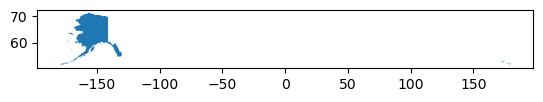

In [38]:
# Plot states
states[states.statefp == 2].plot()

In [39]:
states[states.region>4]

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
34,9,0,78,01802710,78,VI,United States Virgin Islands,00,G4000,A,348021909,1550236187,+18.3392359,-064.9500433,"MULTIPOLYGON (((-64.76834 18.26033, -64.77074 ..."
35,9,0,69,01779809,69,MP,Commonwealth of the Northern Mariana Islands,00,G4000,A,472292521,4644252458,+15.0010865,+145.6181702,"MULTIPOLYGON (((145.05897 14.12500, 145.06302 ..."
36,9,0,66,01802705,66,GU,Guam,00,G4000,A,543555849,934337453,+13.4417451,+144.7719021,"POLYGON ((144.56343 13.44806, 144.56357 13.450..."
41,9,0,60,01802701,60,AS,American Samoa,00,G4000,A,197759069,1307243751,-14.2671590,-170.6682674,"MULTIPOLYGON (((-170.53809 -14.33613, -170.548..."
49,9,0,72,01779808,72,PR,Puerto Rico,00,G4000,A,8869029522,4922249087,+18.2176480,-066.4107992,"MULTIPOLYGON (((-66.32322 17.87767, -66.33170 ..."


## Data Selection

In [53]:
states = states[(states.region!=9) & (~states.statefp.isin([2,15]))]
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico','Hawaii','Alaska'])]

In [50]:
# all the power plants that do not have puerto rico, Hawaii, Alaska 
# We use ~ instead of explanation !(for numbers not equal)
power_plants = power_plants[~power_plants.isin(['Puerto Rico','Hawaii','Alaska'])] 

In [51]:
states.crs ==power_plants.crs

True

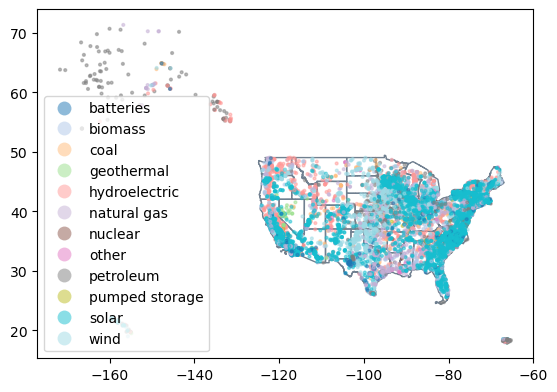

In [54]:
fig, ax = plt.subplots()

# add states 
states.plot(ax=ax,
            color='none',
            edgecolor = 'slategray')

# add electric power plants colored by energy source
power_plants.plot(ax=ax, 
                  column='primsource', # color points according to primsource value
                  legend=True,    # add legend
                  markersize = 4, # adjust point size
                  cmap='tab20', # this color map has 20 different colors
                  alpha=0.5)

plt.show()
